### Importing libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Ingesting Data

In [53]:
train = pd.read_csv('datasets/train.csv', index_col='Id', keep_default_na=False,
                                                       # na_values=
                                                        )
test =  pd.read_csv('datasets/test.csv', index_col='Id', keep_default_na=False,
                                                        #na_values=
                                                        )
#data = pd.concat([train, test])
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [54]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,Inside,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1462,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
1464,60,RL,78,9978,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,6,2010,WD,Normal
1465,120,RL,43,5005,Pave,NA,IR1,HLS,AllPub,Inside,...,144,0,NA,NA,NA,0,1,2010,WD,Normal


### Data Exploration

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotFrontage    1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   Alley          1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearBuilt      1460 non-null   in

In [56]:
train.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [57]:
train.select_dtypes('object').astype('string')
obj_cols  = train.select_dtypes('object').astype('string').columns.to_list()
repl = []
for col in obj_cols:
    if train[col].str.isnumeric().sum() > 100:
        print(col) 
        repl.append(col)

LotFrontage
MasVnrArea
GarageYrBlt


### Change to float

In [58]:
for col in repl:
    train[col].replace('NA', np.nan, inplace=True)
    test[col].replace('NA', np.nan, inplace=True)
    train[col] = train[col].astype(float)
    test[col] = test[col].astype(float)
    


In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

### Variable Distribution

In [60]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [61]:
# grid = sns.FacetGrid(train)
# grid.map_dataframe(sns.histplot)
# plt.savefig('histograms.jpg')

## Missing Data

In [62]:
def check_missing(df=train):
    missing = df.isna().sum()
    missing_data = missing[missing > 0]
    return missing_data

check_missing()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

<Axes: >

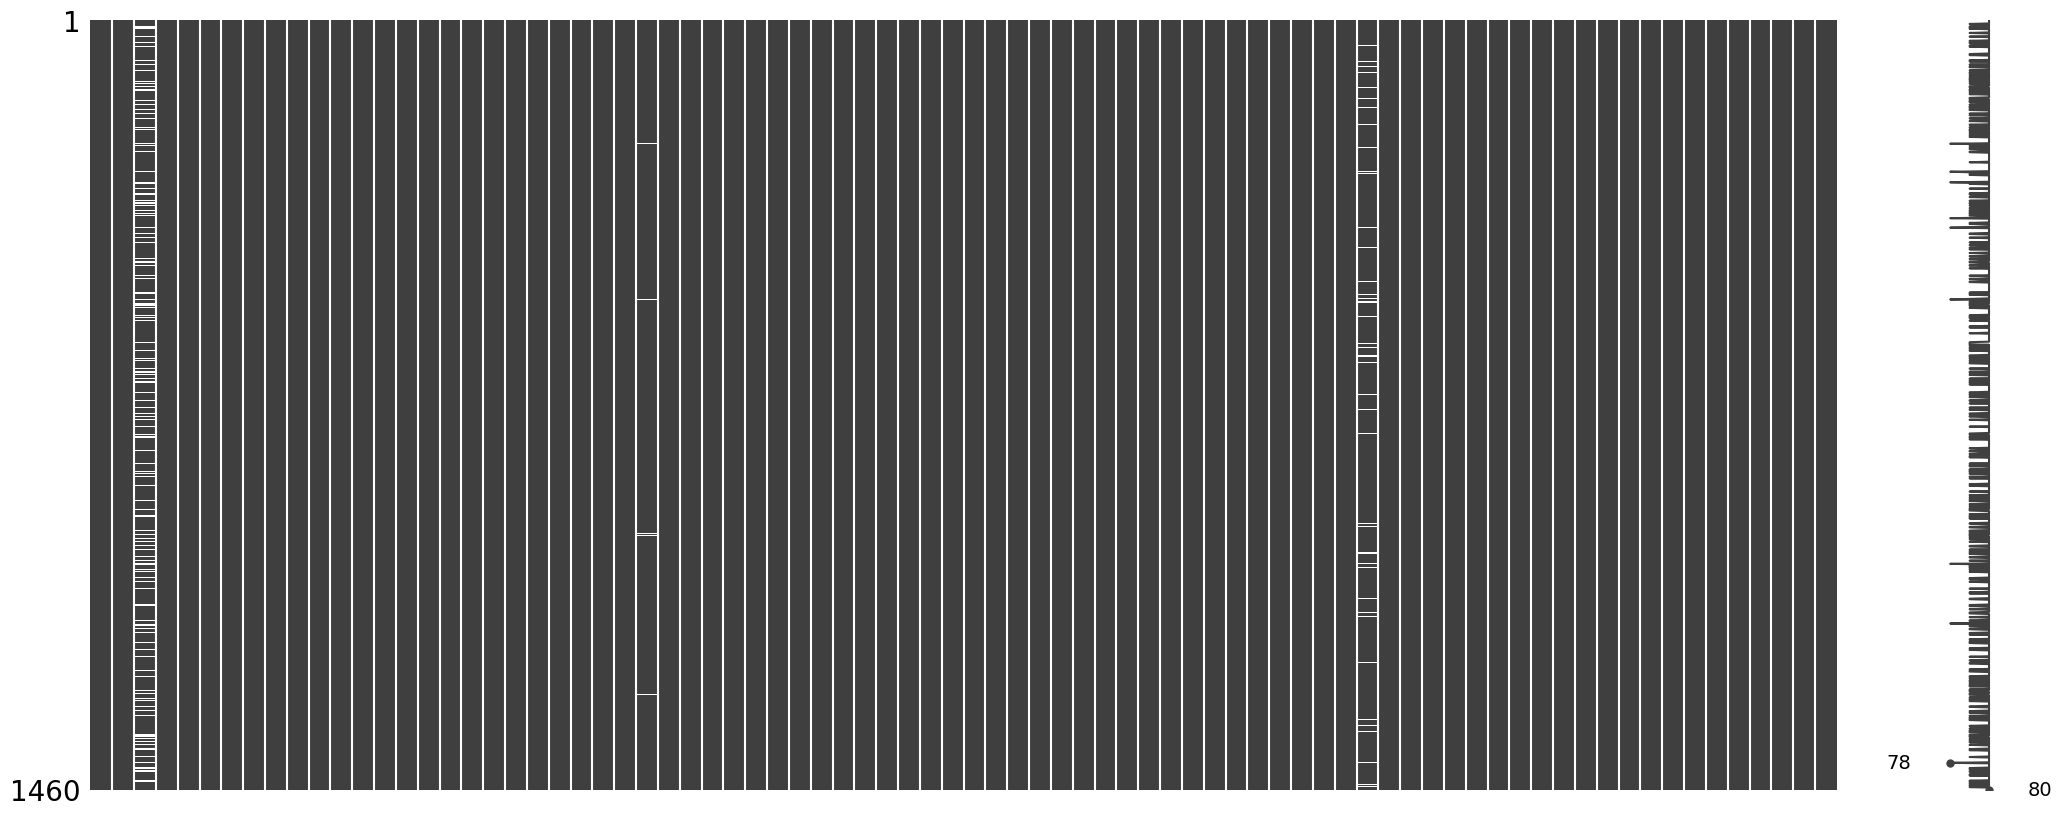

In [63]:
msno.matrix(train)

<Axes: >

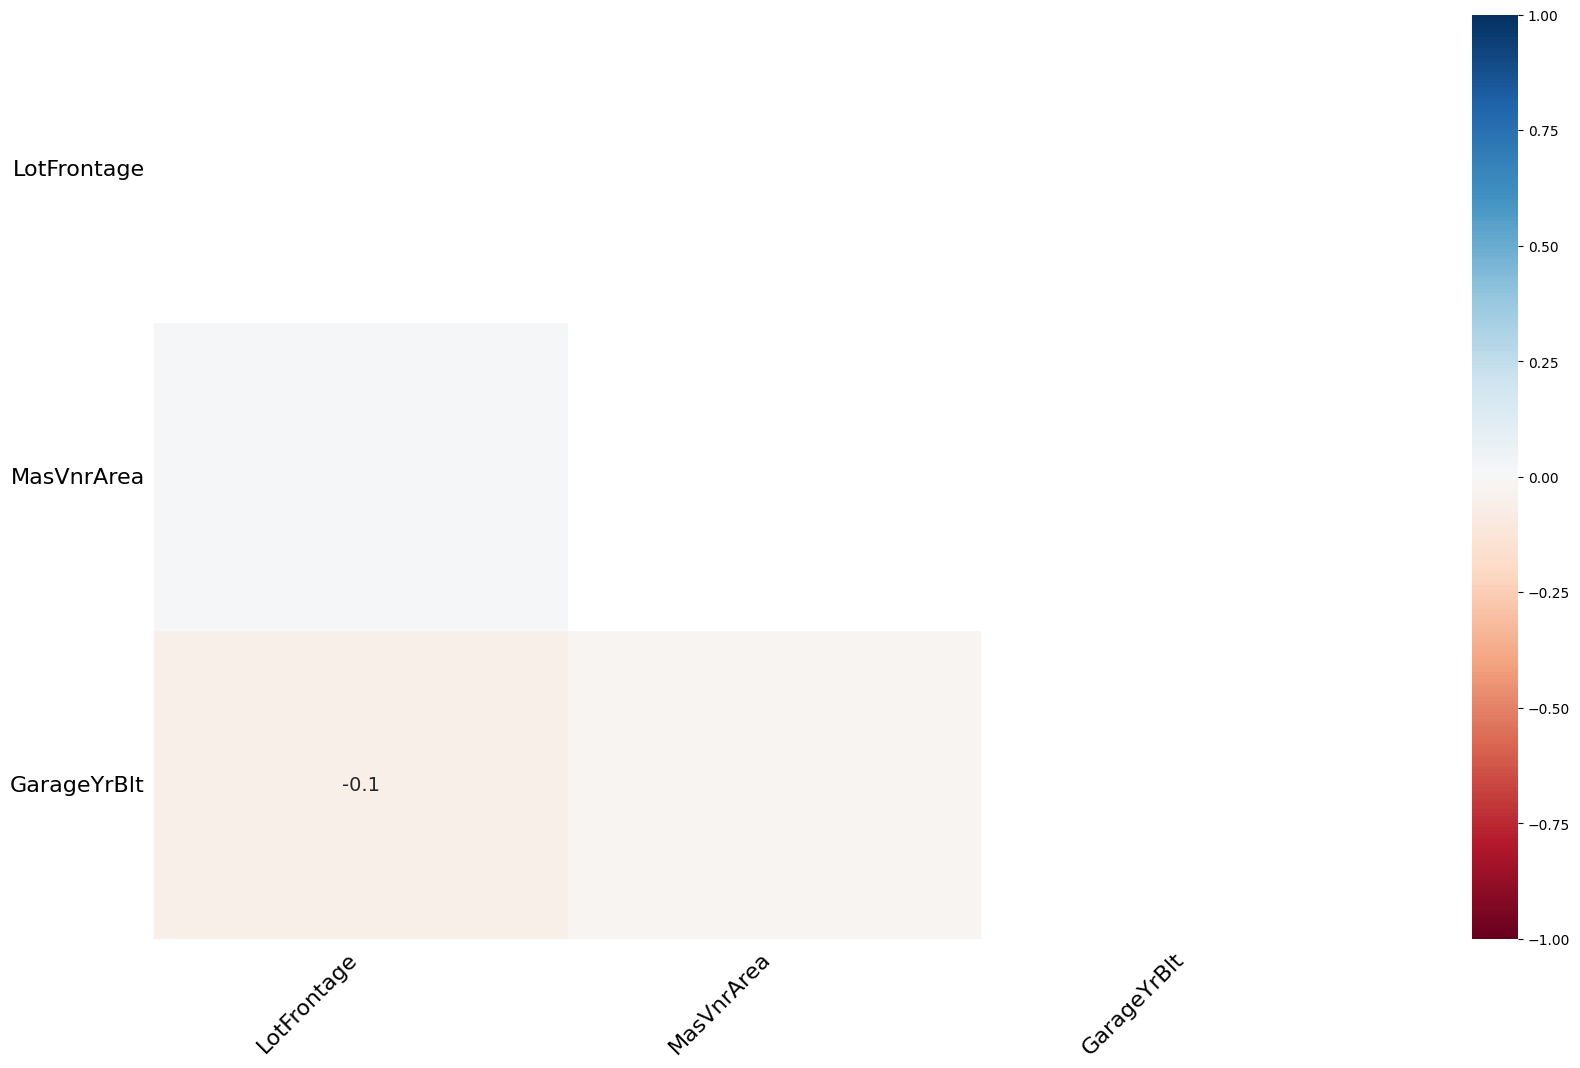

In [64]:
msno.heatmap(train)

# Fill Missing Data

### YearBuilt

In [65]:
corr = train[["GarageYrBlt", "YearBuilt"]].corr()
corr

,GarageYrBlt,YearBuilt
GarageYrBlt,1.000000,0.825667
YearBuilt,0.825667,1.000000


In [66]:
train["GarageYrBlt"].fillna(train["YearBuilt"],inplace=True)
test["GarageYrBlt"].fillna(test["YearBuilt"],inplace=True)

## LotFrontage

In [67]:
check_missing()

LotFrontage    259
MasVnrArea       8
dtype: int64

In [68]:
# sns.catplot(data=train, x='LotFrontage',kind='strip', row='LotConfig', sharex=False,height=3,orient='portrait')

# plt.show()


In [69]:
lot_front_dic = train.mask(train.LotFrontage.isna()) \
            .groupby('LotConfig') \
                ['LotFrontage'].median().round() \
                .to_dict()

lot_front_dic

{'Corner': 80.0, 'CulDSac': 50.0, 'FR2': 64.0, 'FR3': 60.0, 'Inside': 68.0}

In [71]:
# missing_LF = train[(train.LotConfig == key) & (train.LotFrontage.isna())]  

for key, item in lot_front_dic.items():
    train.loc[((train.LotConfig==key ) & (train.LotFrontage.isna())), 'LotFrontage'] = item
    # test.loc[((train.LotConfig==key ) & (train.LotFrontage.isna())), 'LotFrontage'] = item

In [72]:
check_missing(train)

MasVnrArea    8
dtype: int64

In [ ]:
train.to_csv('datasets/train_clean.csv')
test.to_csv('datasets/test_clean.csv')

# Drop Columns

### Drop 8 rows of ManVnrArea

In [232]:
train.dropna(axis = 'rows', subset=["MasVnrArea"], inplace=True)

### Drop categorical columns  with more than 600 missing values

In [233]:
t = int(train.shape[0]*.90)
train.dropna(axis='columns', thresh= t, inplace=True)

### Drop Columns Dominated by a certain value

In [234]:
unbalanced_cols = []
for col in train.select_dtypes('object').columns:
    value_counts = train[col].value_counts(normalize=True)

    max = value_counts.max()
    
    print(value_counts)
   # print(max)

    if max > .70:
        unbalanced_cols.append(col)


MSZoning
RL         0.789256
RM         0.150138
FV         0.042700
RH         0.011019
C (all)    0.006887
Name: proportion, dtype: float64
Street
Pave    0.995868
Grvl    0.004132
Name: proportion, dtype: float64
Alley
NA      0.938017
Grvl    0.034435
Pave    0.027548
Name: proportion, dtype: float64
LotShape
Reg    0.632920
IR1    0.331956
IR2    0.028237
IR3    0.006887
Name: proportion, dtype: float64
LandContour
Lvl    0.897383
Bnk    0.043388
HLS    0.034435
Low    0.024793
Name: proportion, dtype: float64
Utilities
AllPub    0.999311
NoSeWa    0.000689
Name: proportion, dtype: float64
LotConfig
Inside     0.720386
Corner     0.180441
CulDSac    0.064050
FR2        0.032369
FR3        0.002755
Name: proportion, dtype: float64
LandSlope
Gtl    0.946281
Mod    0.044766
Sev    0.008953
Name: proportion, dtype: float64
Neighborhood
NAmes      0.154959
CollgCr    0.102617
OldTown    0.077824
Edwards    0.068871
Somerst    0.057163
Gilbert    0.053719
NridgHt    0.052342
Sawyer     

In [235]:
train.drop(unbalanced_cols,axis='columns',inplace=True)
check_missing()

Series([], dtype: int64)

In [236]:
train.dropna(axis=0,inplace=True)
print(train.shape)
check_missing()

(1452, 52)


Series([], dtype: int64)

# Feature Importance

## Correlation of Predictors with Target Variables

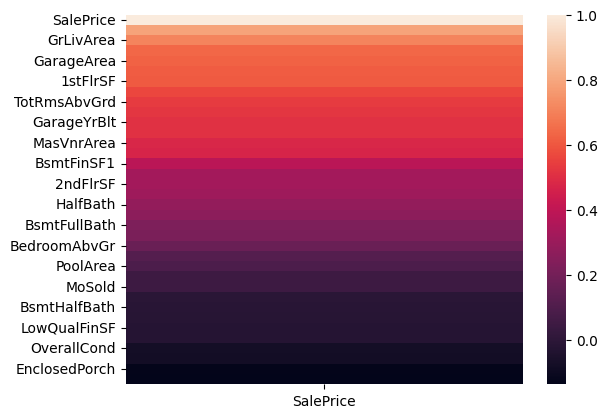

In [237]:
# def plot_correlation_heatmap(target_col: str or None):

#     corr_data: pd.DataFrame
    
#     if target_col is None:
corr_price = train.corr(method='pearson', numeric_only=True)['SalePrice'].sort_values(ascending=False)
#     elif isinstance(target_col, str):
#         corr_data = train.corr(method='pearson')

sns.heatmap(corr_price.to_frame())
plt.show()

# plot_correlation_heatmap('SalePrice')

## Correlation between Predictor Variables (Multicollinearity)

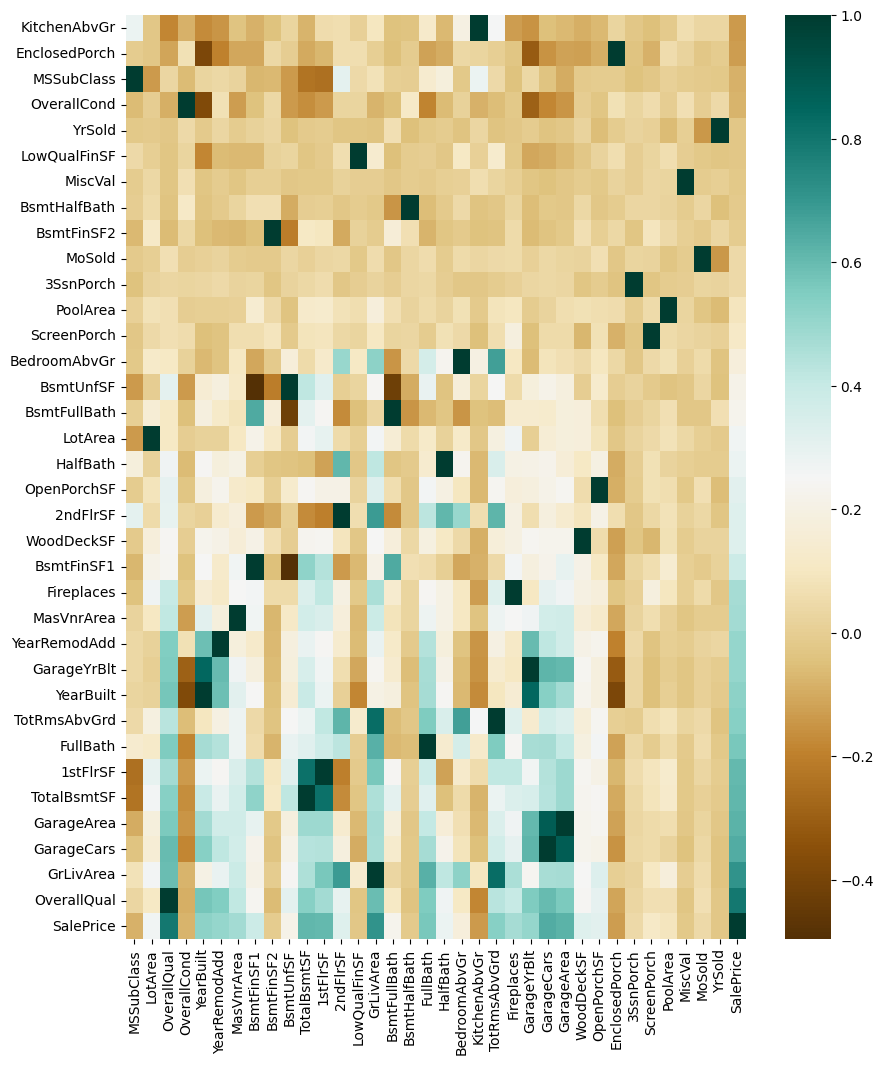

In [238]:
corr_df = train.corr(method='pearson', numeric_only=True).sort_values(by='SalePrice')
fig = plt.figure(figsize=(10,12))
sns.heatmap(corr_df,cmap='BrBG', figure=fig )
plt.show()

In [239]:
corr_df


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
KitchenAbvGr,0.286572,-0.024697,-0.184642,-0.081254,-0.173951,-0.148527,-0.037610,-0.086473,-0.040459,0.028667,...,-0.088863,-0.067892,0.028587,-0.024534,-0.051430,-0.014485,0.062926,0.031032,0.033943,-0.137419
EnclosedPorch,-0.010571,-0.023094,-0.112950,0.074731,-0.386839,-0.192367,-0.110204,-0.105608,0.036749,-0.003684,...,-0.125486,-0.090870,1.000000,-0.037395,-0.083074,0.054397,0.018445,-0.025830,-0.008496,-0.128778
MSSubClass,1.000000,-0.138054,0.034491,-0.061330,0.028397,0.041047,0.022936,-0.069575,-0.066137,-0.138922,...,-0.012634,-0.005462,-0.010571,-0.044049,-0.026414,0.008214,-0.007805,-0.013840,-0.021529,-0.082813
OverallCond,-0.061330,-0.002269,-0.090628,1.000000,-0.376763,0.075121,-0.128101,-0.041927,0.039333,-0.136934,...,-0.004530,-0.031172,0.074731,0.025163,0.054016,-0.002229,0.068642,-0.004034,0.043433,-0.076294
YrSold,-0.021529,-0.012977,-0.025186,0.043433,-0.014441,0.035352,-0.008201,0.016870,0.031851,-0.040377,...,0.021575,-0.055585,-0.008496,0.018714,0.010786,-0.059800,0.004938,-0.145367,1.000000,-0.026180
LowQualFinSF,0.046413,0.004904,-0.029998,0.025140,-0.183749,-0.062045,-0.069071,-0.064345,0.014620,0.028278,...,-0.025669,0.018852,0.061314,-0.004373,0.026627,0.062115,-0.003851,-0.022102,-0.028954,-0.025263
MiscVal,-0.007805,0.038226,-0.031129,0.068642,-0.034048,-0.009927,-0.029815,0.003910,0.004802,-0.023857,...,-0.009694,-0.018335,0.018445,0.000298,0.031822,0.029636,1.000000,-0.006400,0.004938,-0.020951
BsmtHalfBath,-0.002633,0.048377,-0.039207,0.117290,-0.037072,-0.011312,0.026673,0.068611,0.070592,-0.095944,...,0.039929,-0.024489,-0.008518,0.034966,0.031774,0.019937,-0.007484,0.033352,-0.046571,-0.015993
BsmtFinSF2,-0.066137,0.111686,-0.058039,0.039333,-0.047816,-0.066672,-0.072319,-0.049287,1.000000,-0.209705,...,0.067673,0.004294,0.036749,-0.030186,0.088480,0.041610,0.004802,-0.014878,0.031851,-0.010316
MoSold,-0.013840,0.003203,0.068760,-0.004034,0.009362,0.018588,-0.005965,-0.016053,-0.014878,0.033432,...,0.021789,0.068538,-0.025830,0.029761,0.023695,-0.033785,-0.006400,1.000000,-0.145367,0.045136


## Drop highly correlated independent variables

In [240]:
to_drop = corr_df.query('OverallCond >-.80 and OverallCond >.80').index.tolist()
to_drop.append('OverallQual')
train.drop(columns=to_drop, inplace=True)
train

,MSSubClass,LotArea,LotShape,Neighborhood,HouseStyle,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,Reg,CollgCr,2Story,2003,2003,VinylSd,VinylSd,BrkFace,...,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,Reg,Veenker,1Story,1976,1976,MetalSd,MetalSd,None,...,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,IR1,CollgCr,2Story,2001,2002,VinylSd,VinylSd,BrkFace,...,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,IR1,Crawfor,2Story,1915,1970,Wd Sdng,Wd Shng,None,...,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,IR1,NoRidge,2Story,2000,2000,VinylSd,VinylSd,BrkFace,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,7917,Reg,Gilbert,2Story,1999,2000,VinylSd,VinylSd,None,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,13175,Reg,NWAmes,1Story,1978,1988,Plywood,Plywood,Stone,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,9042,Reg,Crawfor,2Story,1941,2006,CemntBd,CmentBd,None,...,0,60,0,0,0,0,2500,5,2010,266500


# Modeling

## Imports

In [241]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


In [242]:
c =test.select_dtypes(include='object').columns.to_list()
d = train.select_dtypes(include='object').columns.to_list()

## Preprocessing Pipeline

In [243]:
import regex as re

def scale_encode(df: pd.DataFrame) -> pd.DataFrame:
    scaler = StandardScaler() 
   # encoder = OneHotEncoder() 
    
    X_num = df.select_dtypes(exclude='object')  
                                                                 
    X_scaled = scaler.fit_transform(X_num) 

    #X_encoded = pd.get_dummies(df, prefix='enc_') 

   # X_dummies= X_encoded.filter(regex='enc_', axis=1) 

    X_final = pd.DataFrame(X_scaled,columns=X_num.columns.to_list(), index=X_num.index)#.join(X_dummies)

    return X_final

    


In [244]:
train_final = scale_encode(train)
y_train = train_final.pop('SalePrice')
x_train = train_final
check_missing(train_final)

Series([], dtype: int64)

# Baseline Model (Linear Regression)    

In [245]:
linear_reg = LinearRegression()

linear_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
for col in test.columns:
    if col not in x_train.columns:
        test.drop(axis='column', columns=col, inplace=True)
        


In [ ]:
X_test_final = scale_encode(test)
check_missing(X_test_final)

In [ ]:
X_test_final.dropna(inplace=True)
y_pred = linear_reg.predict(X_test_final)
pd.Series(y_pred).to_csv('submission.csv')

In [ ]:
# R2 = linear_reg.score(X_test_final, y_test)
# print(f"The R^2 value for this model is : {R2}")

# residuals = y_test-y_pred
# plt.hist(residuals)
# plt.show()

In [ ]:
# y_pred_m = np.maximum(0, y_pred)
# plt.plot(y_test)
# plt.plot(y_pred)
# plt.show()

# Baseline Model (Decision Tree)

In [ ]:
dt = DecisionTreeRegressor(criterion='squared_error')

dt.fit(x_train, y_train)

In [ ]:
dt.feature_names_in_

In [ ]:
dt.predict(X_test_final)